In [ ]:
#Competitive Auctions on Ebay.com- Decision Trees

#The file eBayAuctions.csv contains information on 1972 auctions that transacted on eBay.com during May–June 2004. The goal is to
#use these data to build a model that will classify auctions as competitive or noncompetitive. A competitive auction is defined
#as an auction with at least two bids placed on the item auctioned. The data include variables that describe the item (auction
#category), the seller (his/her eBay rating), and the auction terms that the seller selected (auction duration, opening price, currency,
#day-of-week of auction close). In addition, we have the price at which the auction closed. The task is to predict whether or not the
#auction will be competitive. Data Preprocessing. Convert variable Duration into a categorical variable. Split the data into training (60%) and
#validation (40%) datasets.
# a. Fit a classification tree using all predictors. To avoid overfitting, set the minimum number of records in a terminal
#node to 50 and the maximum tree depth to 7

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn import tree
import pydotplus
import collections
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary


no display found. Using non-interactive Agg backend


In [2]:
df = pd.read_csv('eBayAuctions.csv')
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [3]:
df['Duration']=df['Duration'].astype('category')

In [4]:
df_1 = df.drop(df[(df['Competitive?'] == 1) & (df['ClosePrice'] == df['OpenPrice'])].index)
df_1.shape

(1934, 8)

In [5]:
df_1 = pd.get_dummies(df_1, prefix_sep='_', drop_first=True)
df_1.columns

Index(['sellerRating', 'ClosePrice', 'OpenPrice', 'Competitive?',
       'Category_Automotive', 'Category_Books', 'Category_Business/Industrial',
       'Category_Clothing/Accessories', 'Category_Coins/Stamps',
       'Category_Collectibles', 'Category_Computer', 'Category_Electronics',
       'Category_EverythingElse', 'Category_Health/Beauty',
       'Category_Home/Garden', 'Category_Jewelry', 'Category_Music/Movie/Game',
       'Category_Photography', 'Category_Pottery/Glass',
       'Category_SportingGoods', 'Category_Toys/Hobbies', 'currency_GBP',
       'currency_US', 'Duration_3', 'Duration_5', 'Duration_7', 'Duration_10',
       'endDay_Mon', 'endDay_Sat', 'endDay_Sun', 'endDay_Thu', 'endDay_Tue',
       'endDay_Wed'],
      dtype='object')

In [6]:
df = df.drop(['Category','currency','endDay','Duration'], axis = 1)
df.head()

,sellerRating,ClosePrice,OpenPrice,Competitive?
0,3249,0.01,0.01,0
1,3249,0.01,0.01,0
2,3249,0.01,0.01,0
3,3249,0.01,0.01,0
4,3249,0.01,0.01,0


In [7]:
X = df_1.loc[:, df_1.columns != 'Competitive?']

In [8]:
Y = df_1['Competitive?']

In [9]:
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.4, random_state=1)

In [10]:
valid_Y.value_counts()

1    423
0    351
Name: Competitive?, dtype: int64

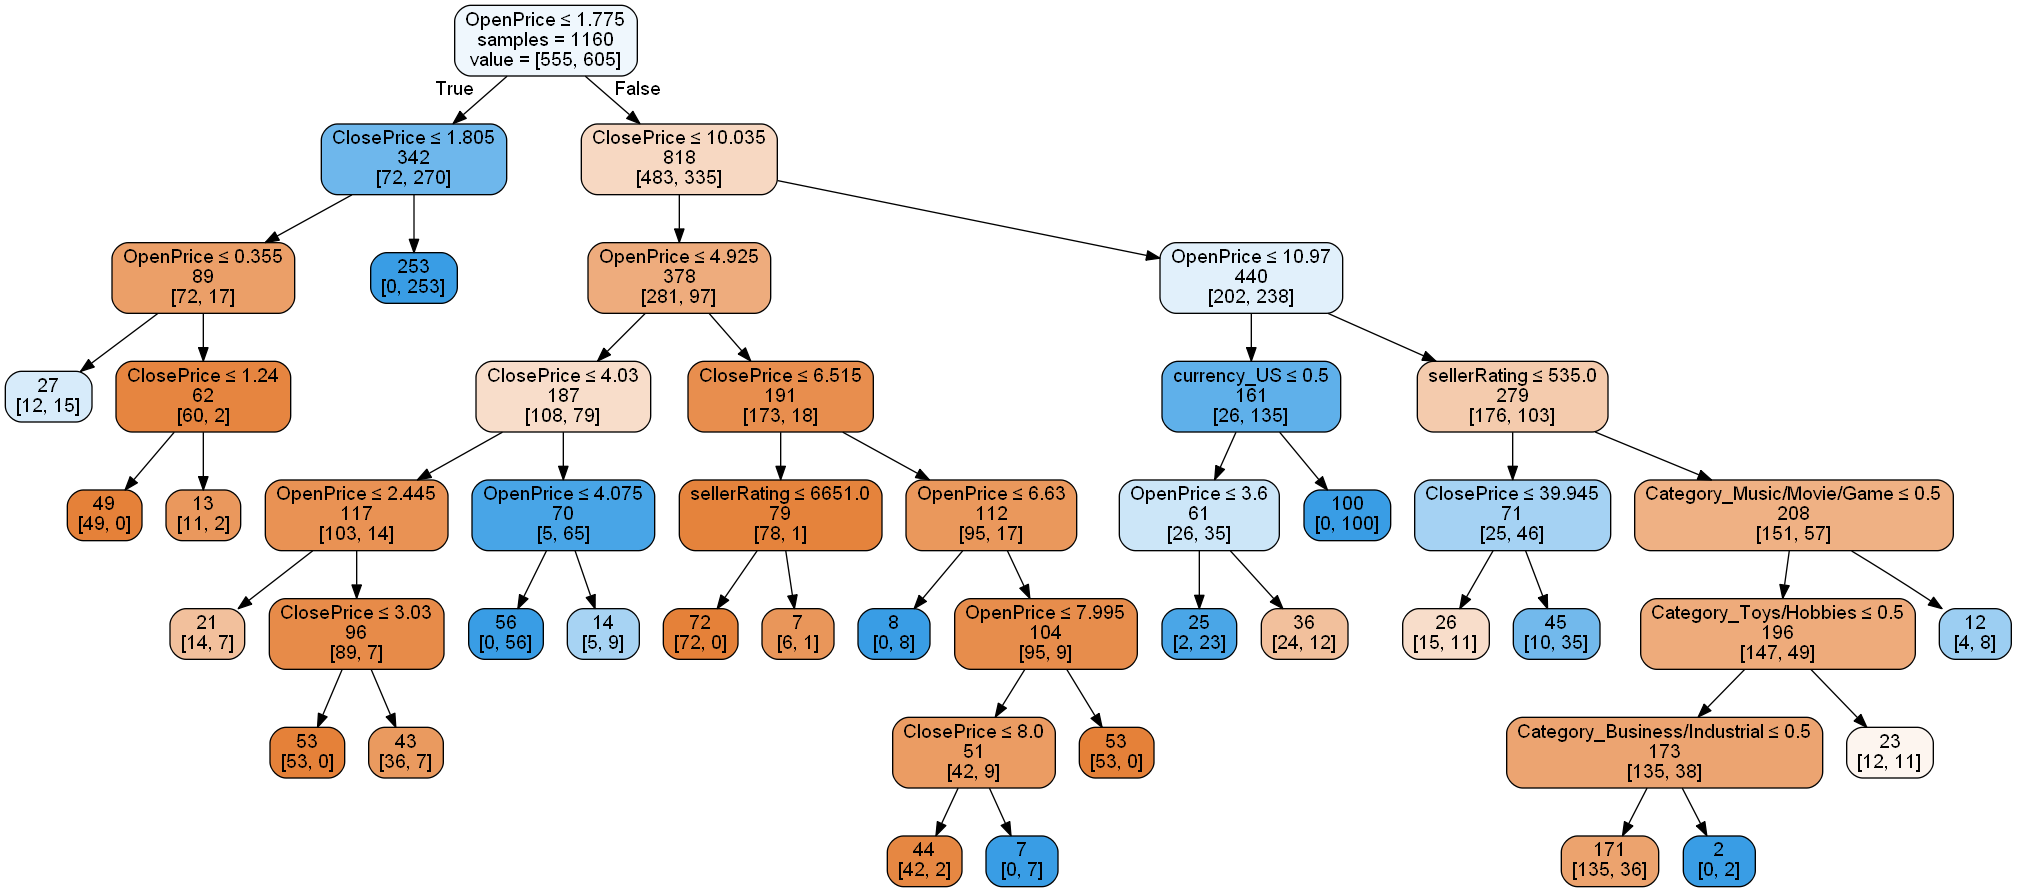

In [11]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
tree1 = DecisionTreeClassifier(min_samples_split=50, max_depth=7)
tree1.fit(train_X, train_Y)
plotDecisionTree(tree1, feature_names=train_X.columns)

In [12]:
predicted_Y = tree1.predict(valid_X)
predicted_Y

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,

In [13]:
classificationSummary(train_Y, tree1.predict(train_X))
classificationSummary(valid_Y, tree1.predict(valid_X))

Confusion Matrix (Accuracy 0.8948)

       Prediction
Actual   0   1
     0 522  33
     1  89 516
Confusion Matrix (Accuracy 0.8553)

       Prediction
Actual   0   1
     0 319  32
     1  80 343


In [14]:
dot_data = tree.export_graphviz(tree1,
                                feature_names=train_X.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('blue', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('Tree Question 1A.png')

True

In [15]:
n_nodes = tree1.tree_.node_count
children_left = tree1.tree_.children_left
children_right = tree1.tree_.children_right
feature = tree1.tree_.feature
threshold = tree1.tree_.threshold

In [16]:
def find_path(node_numb, path, x):
        path.append(node_numb)
        if node_numb == x:
            return True
        left = False
        right = False
        if (children_left[node_numb] !=-1):
            left = find_path(children_left[node_numb], path, x)
        if (children_right[node_numb] !=-1):
            right = find_path(children_right[node_numb], path, x)
        if left or right :
            return True
        path.remove(node_numb)
        return False


def get_rule(path, column_names):
    mask = ''
    for index, node in enumerate(path):
       
        if index!=len(path)-1:
            
            if (children_left[node] == path[index+1]):
                mask += "(df['{}']<= {}) \t ".format(column_names[feature[node]], threshold[node])
            else:
                mask += "(df['{}']> {}) \t ".format(column_names[feature[node]], threshold[node])
    
    mask = mask.replace("\t", "&", mask.count("\t") - 1)
    mask = mask.replace("\t", "")
    return mask

In [17]:
leave_id = tree1.apply(valid_X)

paths ={}
for leaf in np.unique(leave_id):
    path_leaf = []
    find_path(0, path_leaf, leaf)
    paths[leaf] = np.unique(np.sort(path_leaf))

rules = {}
for key in paths:
    rules[key] = get_rule(paths[key], train_X.columns)

In [18]:
rules

{3: "(df['OpenPrice']<= 1.774999976158142) & (df['ClosePrice']<= 1.8050000071525574) & (df['OpenPrice']<= 0.3549999939277768)  ",
 5: "(df['OpenPrice']<= 1.774999976158142) & (df['ClosePrice']<= 1.8050000071525574) & (df['OpenPrice']> 0.3549999939277768) & (df['ClosePrice']<= 1.2400000095367432)  ",
 6: "(df['OpenPrice']<= 1.774999976158142) & (df['ClosePrice']<= 1.8050000071525574) & (df['OpenPrice']> 0.3549999939277768) & (df['ClosePrice']> 1.2400000095367432)  ",
 7: "(df['OpenPrice']<= 1.774999976158142) & (df['ClosePrice']> 1.8050000071525574)  ",
 12: "(df['OpenPrice']> 1.774999976158142) & (df['ClosePrice']<= 10.03499984741211) & (df['OpenPrice']<= 4.924999952316284) & (df['ClosePrice']<= 4.0299999713897705) & (df['OpenPrice']<= 2.4450000524520874)  ",
 14: "(df['OpenPrice']> 1.774999976158142) & (df['ClosePrice']<= 10.03499984741211) & (df['OpenPrice']<= 4.924999952316284) & (df['ClosePrice']<= 4.0299999713897705) & (df['OpenPrice']> 2.4450000524520874) & (df['ClosePrice']<= 3.

In [19]:
tree1.score(valid_X, valid_Y)

0.8552971576227391

In [20]:
classificationSummary(train_Y, tree1.predict(train_X))
classificationSummary(valid_Y, tree1.predict(valid_X))

Confusion Matrix (Accuracy 0.8948)

       Prediction
Actual   0   1
     0 522  33
     1  89 516
Confusion Matrix (Accuracy 0.8553)

       Prediction
Actual   0   1
     0 319  32
     1  80 343
